<a href="https://colab.research.google.com/github/StevenBlaine/CS311_FinalProject_SRB/blob/master/MLA1_SRB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Assignment 1
Steven Blaine
<br>CS430-ON
<br>Machine Learning in the Cloud

### **Import Libraries**

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### **Connect to Google Drive**

In [81]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### **Read Dataset as Pandas DataFrame**

In [83]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/weather_2012.csv')


### **Display Sample of Dataset**

In [84]:
df.head()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [85]:
df.tail()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow
8783,12/31/2012 23:00,0.0,-2.1,86,30,11.3,99.89,Snow


In [86]:
df.sample(5)

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
1749,3/13/2012 21:00,1.1,-1.0,86,20,4.8,100.87,"Rain,Fog"
5587,8/20/2012 19:00,20.1,9.0,49,9,24.1,100.69,Mainly Clear
523,1/22/2012 19:00,-10.4,-16.2,62,19,19.3,102.47,Mostly Cloudy
1402,2/28/2012 10:00,-7.5,-13.6,62,13,24.1,102.65,Clear
7971,11/28/2012 3:00,-3.4,-5.9,83,11,25.0,101.96,Mostly Cloudy


### **Display Columns**

In [87]:
list(df.columns.values)

['Date/Time',
 'Temp (C)',
 'Dew Point Temp (C)',
 'Rel Hum (%)',
 'Wind Spd (km/h)',
 'Visibility (km)',
 'Stn Press (kPa)',
 'Weather']

In [88]:
df.head(0)

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather


### **Rename Columns**

In [89]:
df.columns = ['date_time', 'temp_c', 'dew_point', 'relative_humidity', 'wind_speed', 'visibility', 'pressure', 'weather']

In [90]:
df.head(0)

,date_time,temp_c,dew_point,relative_humidity,wind_speed,visibility,pressure,weather


### **Get Statistics**

In [91]:
df.describe()

,temp_c,dew_point,relative_humidity,wind_speed,visibility,pressure
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


### **Add Fahrenheit Column**

In [94]:
df['temp_f'] = df.apply(lambda x: (9/5)*x['temp_c']+32,axis=1)

In [95]:
df.head()

,date_time,temp_c,dew_point,relative_humidity,wind_speed,visibility,pressure,weather,temp_f
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog,28.76
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog,28.76
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",28.76
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",29.30
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog,29.30


### **Rearrange Columns**

In [96]:
df.insert(1, 'temp_f', df.pop('temp_f'))

In [97]:
df.head()

,date_time,temp_f,temp_c,dew_point,relative_humidity,wind_speed,visibility,pressure,weather
0,1/1/2012 0:00,28.76,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,28.76,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,28.76,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,29.30,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,29.30,-1.5,-3.3,88,7,4.8,101.23,Fog


### **Change Date-Time Data Type**

In [98]:
df['date_time']= pd.to_datetime(df['date_time'])

In [99]:
df.head()

,date_time,temp_f,temp_c,dew_point,relative_humidity,wind_speed,visibility,pressure,weather
0,2012-01-01 00:00:00,28.76,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,28.76,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,28.76,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,29.30,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,29.30,-1.5,-3.3,88,7,4.8,101.23,Fog


### **Create Monthly Average Temp DataFrame**

In [100]:
df.date_time = pd.to_datetime(df.date_time)
df_2 = df.groupby(df.date_time.dt.strftime('%Y-%m')).temp_f.agg(['mean'])

In [122]:
print(df_2.head)

<bound method NDFrame.head of                 mean
date_time           
2012-01    18.731290
2012-02    24.395000
2012-03    37.618226
2012-04    44.616750
2012-05    61.227984
2012-06    68.241250
2012-07    73.022097
2012-08    72.102742
2012-09    61.672000
2012-10    51.718952
2012-11    33.676500
2012-12    26.048629>


### **Create Scatterplot**

In [ ]:
ax = df.plot(kind='scatter', x = 'temp_f', y = 'relative_humidity', title = "Temperature vs. Relative Humidity", s = 11, c = 'green', figsize = [20,10])
ax.set(xlabel="Temperature (F)", ylabel="Relative Humidity")

### **Create Lineplot**

In [ ]:
ax = df_2.plot(title = "Average Temperature per Month", c = 'red', figsize = [20,10])
ax.set(xlabel="Month", ylabel="Temperature (F)")

### **Create Boxplot**

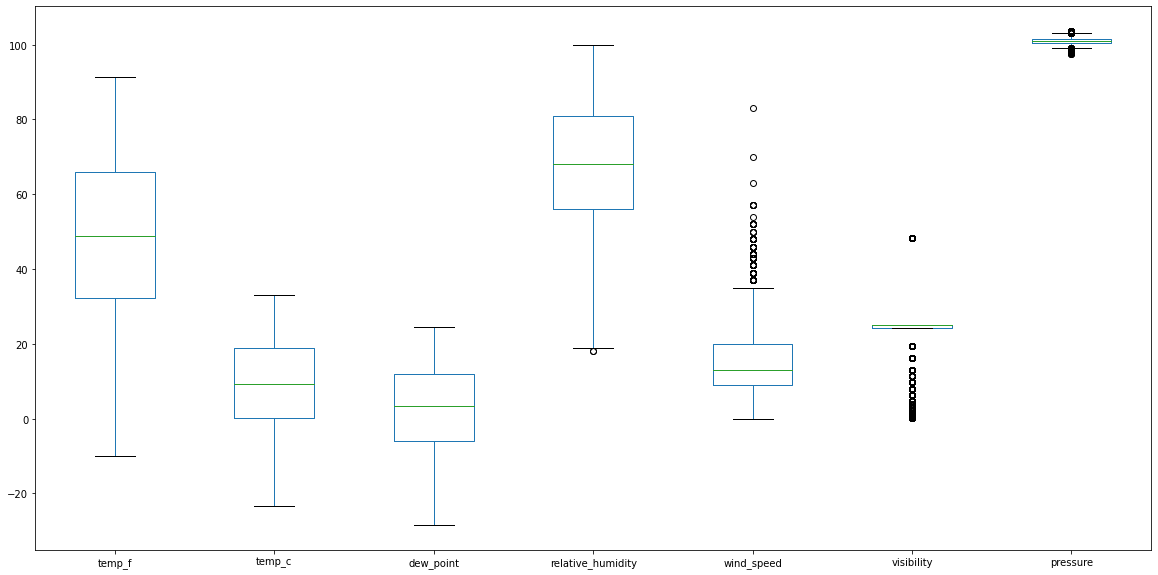

In [127]:
df.boxplot(column =['temp_f', 'temp_c', 'dew_point', 'relative_humidity',	'wind_speed',	'visibility',	'pressure'], figsize = [20,10], grid = False)